In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt

plotting.setup_mpl()

In [2]:
### Loading Lewis Hamilton's Qualifying Lap in 2018
lh = ff1.get_session(2018, 'Singapore', 'Q')
lh.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '5', '77', '7', '3', '11', '8', '31',

In [3]:
### Loading Charles Leclerc's Qualifying Lap in 2019
cl = ff1.get_session(2019, 'Singapore', 'Q')
cl.load()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 23: Ignoring late data for a previously processed lap.The data may contain errors (previous: 8; current 9)
api         WARNING 	Driver  3: Ignoring late data for a previously processed lap.The data may contain errors (previous: 11; current 12)
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loadin

In [4]:
lec_lap = cl.laps.pick_driver('LEC').pick_fastest()
ham_lap = lh.laps.pick_driver('HAM').pick_fastest()

lec_lap = lec_lap.get_car_data().add_distance()
ham_lap = ham_lap.get_car_data().add_distance()

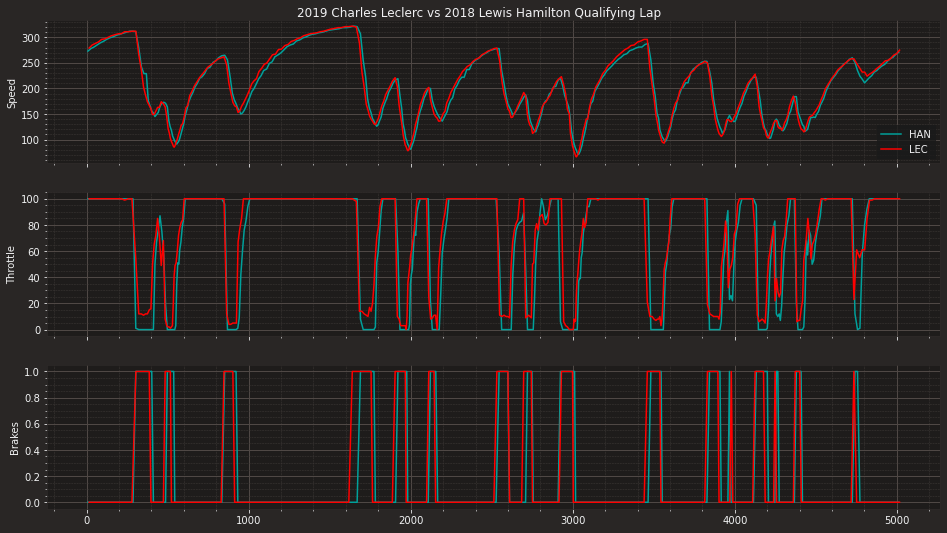

In [5]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("2019 Charles Leclerc vs 2018 Lewis Hamilton Qualifying Lap", y=0.9)

ax[0].plot(ham_lap['Distance'], ham_lap['Speed'], color='#00A19B', label='HAN')
ax[0].plot(lec_lap['Distance'], lec_lap['Speed'], color='red', label='LEC')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ham_lap['Distance'], ham_lap['Throttle'], color='#00A19B', label='HAM')
ax[1].plot(lec_lap['Distance'], lec_lap['Throttle'], color='red', label='LEC')
ax[1].set(ylabel='Throttle')

ax[2].plot(ham_lap['Distance'], ham_lap['Brake'], color='#00A19B', label='HAM')
ax[2].plot(lec_lap['Distance'], lec_lap['Brake'], color='red', label='LEC')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [6]:
fig.savefig('2018 Lewis Hamilton vs 2019 Charles Leclerc Qualifying Lap.png', dpi = 600)